In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random as ran

In [2]:
def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

def vel(position_old, position_new, dt):
    N = mass.shape[0]
    vel = np.zeros([N,3])
    for i in range(N):
        vel = (position_new - position_old)/dt
    return vel

def ke_func(mass,velocity):
    ke = 0
    N = mass.shape[0]
    for i in range(N):
        ke = ke + 0.5*mass[i]*(((velocity[i,0])**2)+((velocity[i,1])**2))
    return(ke)

def pe_func(mass,position):
    N = mass.shape[0]
    pe=0
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            pe = pe + (1/distance_pow6**2) - (2/distance_pow6)
    return pe

def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

In [3]:
# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m

In [4]:
# System of 4 equal masses on corners of square with no initial velocity (cold start)
N=32
mass=np.full(N,1.0)
position=np.zeros([N,3])

position[0,:]=np.array([+1.0,+1.0,0.0])
position[1,:]=np.array([-1.0,+1.0,0.0])
position[2,:]=np.array([-1.0,-1.0,0.0])
position[3,:]=np.array([+1.0,-1.0,0.0])
position[4,:]=np.array([+1.0,+3.0,0.0])
position[5,:]=np.array([+1.0,+5.0,0.0])
position[6,:]=np.array([+1.0,+7.0,0.0])
position[7,:]=np.array([-1.0,+3.0,0.0])
position[8,:]=np.array([-1.0,+5.0,0.0])
position[9,:]=np.array([-1.0,+7.0,0.0])
position[10,:]=np.array([+1.0,-3.0,0.0])
position[11,:]=np.array([+1.0,-5.0,0.0])
position[12,:]=np.array([+1.0,-7.0,0.0])
position[13,:]=np.array([-1.0,-3.0,0.0])
position[14,:]=np.array([-1.0,-5.0,0.0])
position[15,:]=np.array([-1.0,-7.0,0.0])
position[16,:]=np.array([+3.0,+1.0,0.0])
position[17,:]=np.array([+5.0,+1.0,0.0])
position[18,:]=np.array([+7.0,+1.0,0.0])
position[19,:]=np.array([+3.0,-1.0,0.0])
position[20,:]=np.array([+5.0,-1.0,0.0])
position[21,:]=np.array([+7.0,-1.0,0.0])
position[22,:]=np.array([-3.0,+1.0,0.0])
position[23,:]=np.array([-5.0,+1.0,0.0])
position[24,:]=np.array([-7.0,+1.0,0.0])
position[25,:]=np.array([-3.0,-1.0,0.0])
position[26,:]=np.array([-5.0,-1.0,0.0])
position[27,:]=np.array([-7.0,-1.0,0.0])
position[28,:]=np.array([+7.0,+7.0,0.0])
position[29,:]=np.array([+7.0,-7.0,0.0])
position[30,:]=np.array([-7.0,+7.0,0.0])
position[31,:]=np.array([-7.0,-7.0,0.0])

velocity=np.zeros([N,3])

In [5]:
# Step size and number of time steps
dt=0.039
tot_time=50
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position
velocitys = np.zeros([N,3,num_steps+1])
velocitys[:,:,0] = velocity

kes = np.zeros([num_steps+1])
pes = np.zeros([num_steps+1])
tes = np.zeros([num_steps+1])

In [6]:
# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
velocity = vel(position_old, position_new, dt)

for i in range(N):
    for j in range(2):
        if position[i,j] >= 8.0:
            position[i,j] = 8.0 - (position[i,j] - 8.0)
            velocity[i,j] = 0.0 - velocity[i,j]
            
for i in range(N):
    for j in range(2):
        if position[i,j] <= -8.0:
            position[i,j] = -8.0 - (position[i,j] + 8.0)
            velocity[i,j] = 0.0 - velocity[i,j]

positions[:,:,1]=position
velocitys[:,:,1] = velocity

kes[1] = ke_func(mass,velocity)
pes[1] = pe_func(mass,position)

In [7]:
# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=accel_LJ(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    velocity = vel(position_old, position_new, dt)
    
    for i in range(N):
        for j in range(2):
            if position[i,j] >= 8.0:
                position[i,j] = 8.0 - (position[i,j] - 8.0)
                velocity[i,j] = 0.0 - velocity[i,j]
                
    for i in range(N):
        for j in range(2):
            if position[i,j] <= -8.0:
                position[i,j] = -8.0 - (position[i,j] + 8.0)
                velocity[i,j] = 0.0 - velocity[i,j]
    
    positions[:,:,t]=position
    velocitys[:,:,t]=velocity
    
    kes[t] = ke_func(mass,velocity)
    pes[t] = pe_func(mass,position)

<IPython.core.display.Javascript object>


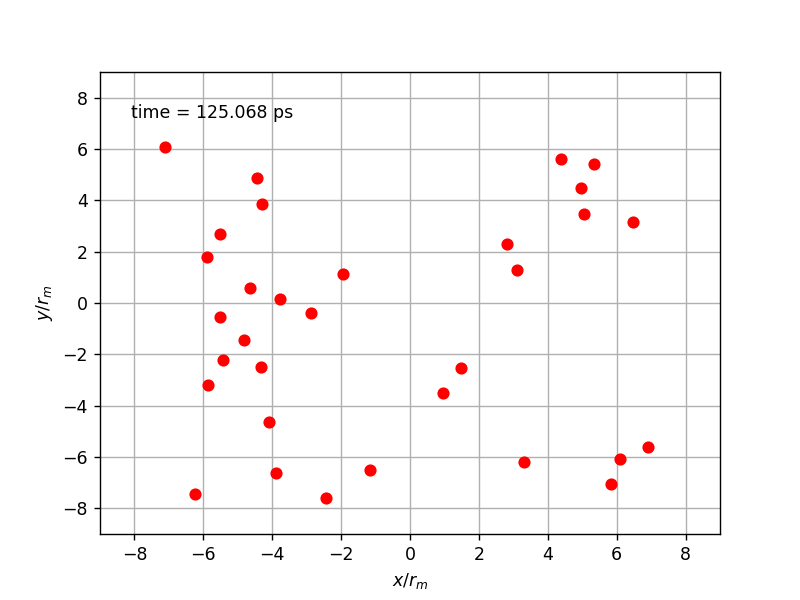

In [8]:
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-9.0,+9.0), ylim=(-9.0,+9.0))
ax.grid()
#plt.axis('equal');
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

plt.show()

In [9]:
time = np.arange(num_steps+1)
tes = kes + pes

<IPython.core.display.Javascript object>


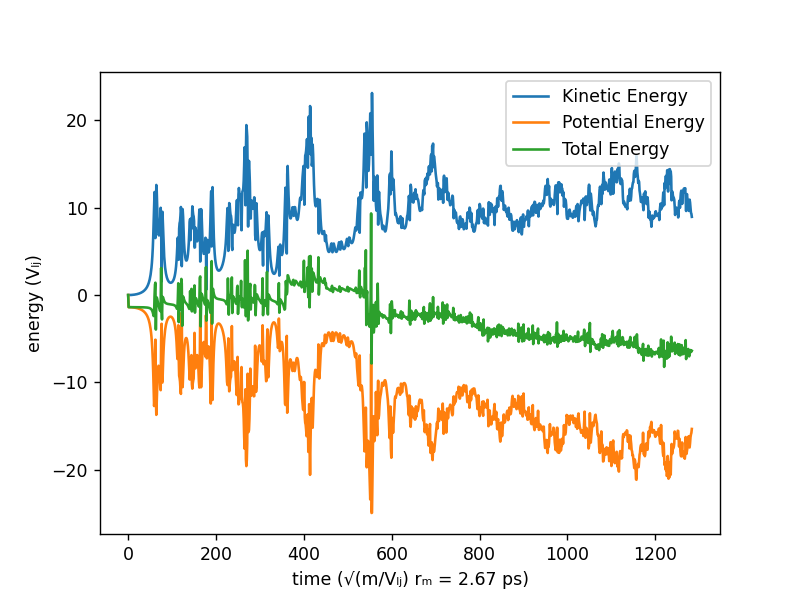

In [10]:
fig = plt.figure()
plt.plot(time,kes, label='Kinetic Energy')
plt.plot(time,pes, label='Potential Energy')
plt.plot(time,tes, label='Total Energy')
plt.legend()
plt.xlabel('time (√(m/V{}) r{} = 2.67 ps)'.format(get_sub('LJ'),get_sub('m')));
plt.ylabel('energy (V{})'.format(get_sub('LJ')));
plt.savefig("MD1_alle")